In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt


In [2]:
with open('lettres1.pkl', 'rb') as f:
    data = pkl.load(f, encoding='latin1') 
X = np.array(data.get('letters')) # récupération des données sur les lettres
Y = np.array(data.get('labels')) # récupération des étiquettes associées 

In [3]:
# affichage d'une lettre
def tracerLettre(let):
    a= -let*np.pi/180; # conversion en rad
    coord = np.array([[0, 0]]); # point initial
    for i in range(len(a)):
        x = np.array([[1, 0]]);
        rot = np.array([[np.cos(a[i]), -np.sin(a[i])],[ np.sin(a[i]),np.cos(a[i])]])
        xr = x.dot(rot) # application de la rotation
        coord = np.vstack((coord,xr+coord[-1,:]))
        plt.figure()
        plt.plot(coord[:,0],coord[:,1])
    plt.savefig("exlettre.png")
    plt.show()
    return

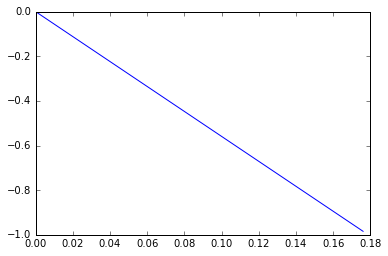

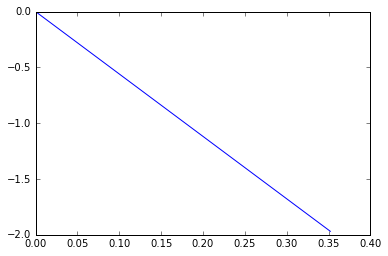

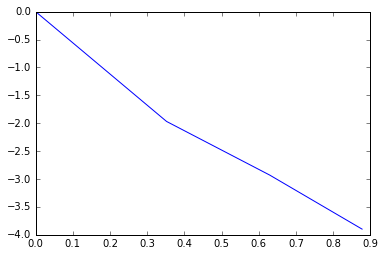

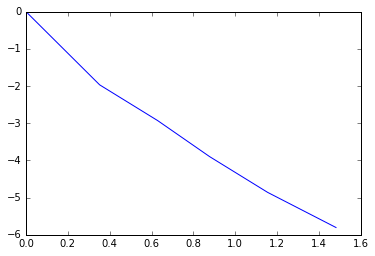

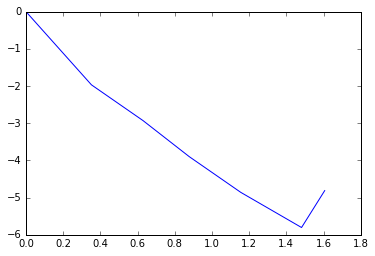

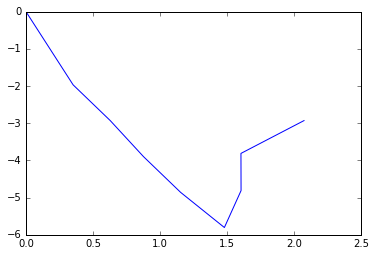

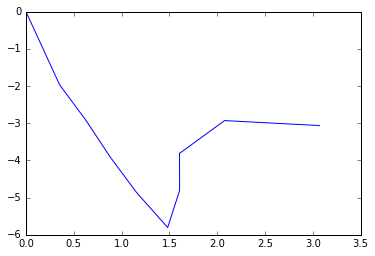

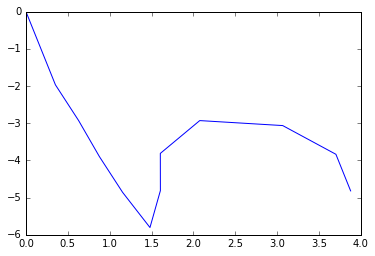

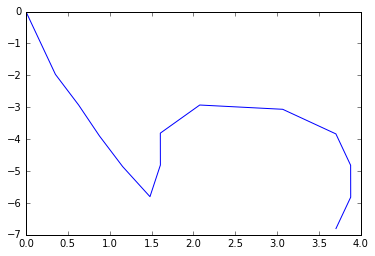

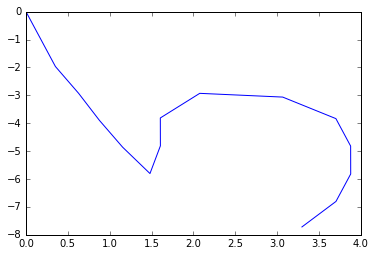

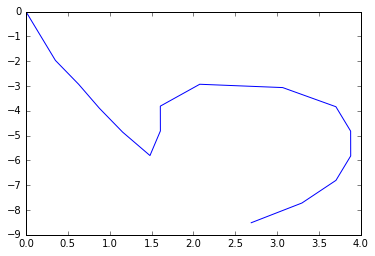

In [4]:
#teste
t=tracerLettre(X[20])

# Apprentissage d'un modèle CM (max de vraisemblance)

# 1. Discrétisation

In [108]:
def discretise(X,d):
    l= list()
    for x in X: 
        intervalle = 360./d
        l.append(np.floor(x/intervalle))
        
    return np.array(l) # return l, ne marche pas 

In [109]:
#teste
xd= discretise(X,3)
print(xd[0])

[ 0.  2.  2.  2.  2.  2.  2.  2.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.
  0.  0.  0.  0.  0.]


In [110]:
xd

array([ array([ 0.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.]),
       array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  2.,  2.,  2.,  2.,  0.,  0.]),
       array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.]),
       array([ 2.,  2.,  2.,  2.,  2.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  2.,
        2.,  2.,  2.,  0.,  0.,  0.,  0.]),
       array([ 0.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.]),
       array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  0.,  1.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.]),
       array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.]),
       array([ 0.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,

In [100]:
#teste
xd= discretise(X,3)
print(xd[0])

[array([ 0.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.]), array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  2.,  2.,  2.,  2.,  0.,  0.]), array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.]), array([ 2.,  2.,  2.,  2.,  2.,  0.,  0.,  1.,  1.,  1.,  1.,  2.,  2.,
        2.,  2.,  2.,  0.,  0.,  0.,  0.]), array([ 0.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  0.,  1.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  2.,  2.,  2.,  0.,  0.,  0.,  0.]), array([ 0.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  2.,  2.,  2.

# 2. Regrouper les indices des signaux par classe (pour faciliter l'apprentissage)

In [101]:
def groupByLabel(y):
    index = []
    for i in np.unique(y): # pour toutes les classes
        ind, = np.where(y==i)
        index.append(ind)
    return index

In [102]:
#teste
groupByLabel(Y) #Chaque ligne regroupe les indices de signaux correspondant à une classe 

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]),
 array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 array([33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 array([44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]),
 array([55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 array([66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]),
 array([77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]),
 array([88, 89, 90, 91, 92, 93, 94, 95, 96, 97]),
 array([ 98,  99, 100, 101, 102, 103, 104, 105, 106, 107]),
 array([108, 109, 110, 111, 112, 113, 114, 115, 116, 117]),
 array([118, 119, 120, 121, 122, 123, 124, 125, 126, 127]),
 array([128, 129, 130, 131, 132, 133, 134, 135, 136, 137]),
 array([138, 139, 140, 141, 142, 143, 144, 145, 146, 147]),
 array([148, 149, 150, 151, 152, 153, 154, 155, 156, 157]),
 array([158, 159, 160, 161, 162, 163, 164, 165, 166, 167]),
 array([168, 169, 170, 171, 172, 173, 174, 175, 176, 177]),
 array([178, 179, 180, 181, 182, 183, 

# 3. Apprendre les modèles CM

In [114]:
def learnMarkovModel(xc, d):
    #initialisation:
    A = np.zeros((d,d))
    pi = np.zeros(d)
    
    for i in range(len(xc)):
        pi[int(xc[i][0])] =   pi[int(xc[i][0])] +1 
      
    
    for i in range(len(xc)):
        for j in range(1,len(xc[i])):
            A[int(xc[i][j-1])][int(xc[i][j])] =     A[int(xc[i][j-1])][int(xc[i][j])]  + 1


    A = A/np.maximum(A.sum(1).reshape(d,1),1) # normalisation
    pi = pi/(pi.sum())
    return A,pi   

In [115]:
#teste 
d=3
indice = groupByLabel(Y)
xc= discretise(X,d)
#[1,2,3]print(xc)
print(index[0])
t=xc[index[0]]
learnMarkovModel(t,d)

[ 0  1  2  3  4  5  6  7  8  9 10]


(array([[ 0.84444444,  0.06666667,  0.08888889],
        [ 0.        ,  0.83333333,  0.16666667],
        [ 0.11382114,  0.06504065,  0.82113821]]),
 array([ 0.36363636,  0.        ,  0.63636364]))

# 4. Stocker les modèles dans une liste

In [136]:
def learnMarkovModels(X,Y,d):
    
    Xd = discretise(X,d)  # application de la discrétisation
    index = groupByLabel(Y)  # groupement des signaux par classe
    models = []
    for cl in range(len(np.unique(Y))):
    # parcours de toutes les classes et optimisation des modèles
         models.append(learnMarkovModel(Xd[index[cl]], d))
    return models
#teste 
models = learnMarkovModels(X,Y,20)

[(array([[ 0.4       ,  0.45      ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.1       ,  0.05      ],
         [ 0.13333333,  0.66666667,  0.2       ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.2       ,  0.6       ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.2       ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,

# Test (affectation dans les classes sur critère MV)

### 1. (log)Probabilité d'une séquence dans un modèle

In [130]:
def probaSequence(s,Pi,A):
    #Pi la proba intiale
    #A la matrice de transission
    #s c'est une sequence quelconque 
    # on utilise la formule P(s1s2s3)= P(s1)*P(s2/s1)*P(s3/s2) 
    #                                = Pi(s1)*A[s1,s2]*A[s2,s3]
    
    x=0
    x = np.log(Pi[int(s[0])])
    for i in range(1,len(s)):
        x += np.log(A[int(s[i-1])][int(s[i])])
        
    return x
    

In [145]:
d=3 # A pi
indice = groupByLabel(Y)
models =learnMarkovModels(X,Y,d)
l = []
for i in models:
    l.append(probaSequence(xd[0],i[1],i[0]))
print(l)

[-13.491085999932634, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -12.482856781808644]


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
